<h1>1 &nbsp; Problema proposto: Lei de resfriamento de Newton </h1>
        
&nbsp; Vamos considerar uma xícara com café cuja temperatura inicial é de $80^{\circ}C$  e que
se encontra em uma sala onde a temperatura do ar é de $T_{a}=20^{\circ}C$. &nbsp; Admite-se que a temperatura do
ar é constante. &nbsp; É conveniente neste caso utilizar como unidades $^{\circ}C$ (para a temperatura) e minutos
(para o tempo). &nbsp; Nessas unidades podemos utilizar o valor para o coeficiente de transferência de
calor, $κ = 0.1 \: (min \: κ^{-1}).$

<h1>2. &nbsp;Emprego das bibliotecas SymPy e SciPy</h1>

<h2>2.1 &nbsp; Solução analítica </h2>

&nbsp; O modelo do resfriamento de Newton é dado por:

$$\frac{dT}{dt}=-κ \: ( \: T \:- \: T_{a} \: )$$

&nbsp; Substituindo as constantes $T_{a}=20$ e $κ=0.1$ no modelo de resfriamento, temos o seguinte problema de valor inicial:

$$\begin{cases} \frac{dT}{dt}=-0.1 \: ( \: T \:- 20 \: )  \\ T(0)= 80 \end{cases}$$

&nbsp; A equação diferencial é separável, então pode ser escrita como:

$$ \frac{dT}{T-20} = -0.1 \ dt$$

integrando a equação, temos,

$$ ln|T-20| + C_{1}= -0.1t + C_{2}$$

isolando $T$, obtemos a solução geral:

$$ T(t)= Ce^{-0.1t} + 20 $$

&nbsp; Determinando $C$ a partir do valor inicial:

$$ T(0) = C + 20 \Rightarrow C+20=80 \Rightarrow C=60$$

&nbsp; Portanto, a solução do problema de valor inicial é:

$$ T(t) = 60e^{-0.1t}+20 $$

<h2>2.2 &nbsp; Solução através do SymPy</h2>


In [1]:
#Importando a biblioteca sympy
import sympy as sp

#Declarando função
T = sp.Function("T")

#Declarando variável
t = sp.Symbol("t")

In [2]:
#Construindo a EDO
eq_dif = sp.Eq(T(t).diff(t),-0.1*(T(t)-20))
eq_dif

Eq(Derivative(T(t), t), 2.0 - 0.1*T(t))

<h3> sympy.dsolve()</h3>

In [3]:
#Obtendo solução particular
sg = sp.dsolve(eq_dif,ics={T(0):80})
sg

Eq(T(t), 20.0 + 60.0*exp(-0.1*t))

<h2>2.3 &nbsp; Solução através do SciPy</h2>

&nbsp; Importando as bibliotecaas Numpy e SciPy

In [4]:
import numpy as np
import scipy.integrate as sciInt

&nbsp; Carregando o diretório <i><b>python/</b></i> que contém as funções escritas ao longo dos tópicos:

In [5]:
import sys
sys.path.insert(0,'../python')

&nbsp; Escrevendo arquivo contendo a função <b><i>modelo(&lt;temperatura&gt;,&lt;tempo&gt;)</i></b> contendo o modelo matemático do fenômeno

In [6]:
%%writefile ../python/modelo.py
#Definindo o modelo de resfriamento
def modelo(t,T):
    return -0.1*(T-20)

Overwriting ../python/modelo.py


&nbsp; Criando o vetor tempo:

In [7]:
t = np.arange(0,60,0.1)

&nbsp; Importando o <i><b>modelo</b></i>:

In [8]:
from modelo import modelo

<h3> scipy.integrate.odeint()</h3>
&nbsp; Método: LSODA

In [9]:
sol1 = sciInt.odeint(modelo, y0=80, t=t, tfirst=True)

<h3> scipy.integrate.solve_ivp()</h3>
&nbsp; Método: RK45 (Padrão)

In [10]:
sol2 = sciInt.solve_ivp(modelo, t_span=(0,max(t)), y0=[80], t_eval=t)

<h2>2.4 &nbsp; Esboço do gráfico através do Matplotlib</h2>
&nbsp; Esboço das soluções pelo SymPy e SciPy (LSODA e RK45) para uma hora.

In [11]:
#importando a biblioteca Matplotlib
import matplotlib.pyplot as plt

#Criando intervalo de tempo
t = np.arange(0,60,0.1) 

<h3> Sympy</h3>

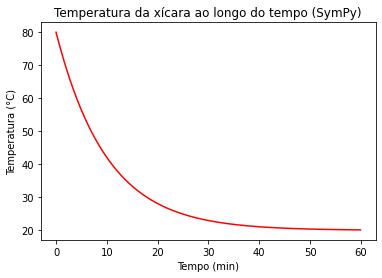

In [12]:
#Solução pelo SymPy
plt.plot(t,20+60*np.exp(-0.1*t),"r") 

#Exibindo figura
plt.title("Temperatura da xícara ao longo do tempo (SymPy)")
plt.xlabel("Tempo (min)")
plt.ylabel("Temperatura (°C)")
plt.show()

<h3>LSODA</h3>

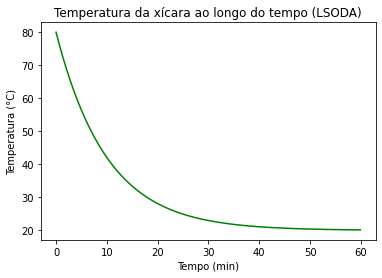

In [13]:
#Solução pelo LSODA
plt.plot(t,sol1,"g")

#Exibindo figura
plt.title("Temperatura da xícara ao longo do tempo (LSODA)")
plt.xlabel("Tempo (min)")
plt.ylabel("Temperatura (°C)")
plt.show()

<h3>RK45</h3>

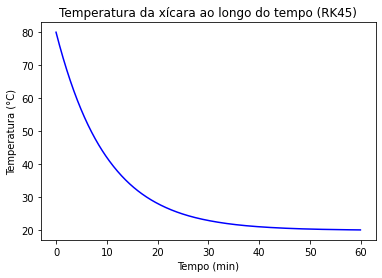

In [14]:
#solução pelo SciPy (RK45)
plt.plot(t,sol2.y[0],"b")

#Exibindo figura
plt.title("Temperatura da xícara ao longo do tempo (RK45)")
plt.xlabel("Tempo (min)")
plt.ylabel("Temperatura (°C)")
plt.show()

<h1>3 &nbsp; O Método de Euler </h1>

&nbsp; O método de Euler baseia-se no fato de conhecermos a derivada da função em qualquer ponto e um ponto pertencente à curva para determinar uma coleção de pontos próximos a solução do problema.

&nbsp; Dado o problema de valor inicial (Lei de resfriamento de Newton):

$$\begin{cases} T'=-0.1 \: ( \: T \:- 20 \: )  \\ T(0)= 80 \end{cases}$$

&nbsp; Conhecendo o valor inicial representado por $(t_{0},T_{0})$, temos:

$$ T'(t_{0}) \approx \frac{T_{1}-T_{0}}{t_{1}-t_{0}} $$

&nbsp; Isolando $T_{1}$,

$$ T_{1} \approx T_{0} + (t_{1}-t_{0})\ T'(t_{0}) $$

&nbsp; Considerando $f(T)=-0.1 \: ( \: T \:- 20 \: )=T' $, temos:

$$ T_{1} \approx T_{0} + (t_{1}-t_{0})\ f(t_{0}) $$

&nbsp; Mas, $(t_{1}-t_{0})$ é o passo de derivação e pode ser tratado como uma constante $h$, portanto:

$$ T_{1} \approx T_{0} + h\ f(t_{0})$$
$$ T_{2} \approx T_{1} + h\ f(t_{1})$$
$$ \vdots $$
$$ T_{n+1} \approx T_{n} + h\ f(t_{n})$$

<h2>3.1 &nbsp; Método de Euler - Pseudocódigo</h2>
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<b>Entrada:</b> A função $f(T)$, a condição inicial $(t_{0},T_{0})$, o passo $h$ e o vetor tempo $t$.<br>
    <b>Saída:</b> os vetores $t$ e $T$ tais que $T_{i} \approx T(t_{i})$ .<br>
    <b>Início:</b>
    <ol>
  <li>$t\leftarrow  t_{inicial}:h:t_{final}$</li>
  <li>$T_{1}\leftarrow  80$</li>
  <li><b>para</b> t <b>faça</b></li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$T_{i+1} \leftarrow  T_{i}+h*f(T_{i})$</li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$T \leftarrow T_{i+1}$</li>
  <li><b>fim</b></li>
  <li>retorna($t,T$)</li>
</ol>
    <b>Fim</b>
</div>

<h2>3.2 &nbsp; Método de Euler - Implementação</h2>

&nbsp; Importando as bibliotecas NumPy e Matplotlib ao arquivo <b>atual</b>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Carregando o diretório <i><b>python/</b></i> que contém as funções escritas ao longo dos tópicos:

In [2]:
import sys
sys.path.insert(0, '../python')

&nbsp; Escrevendo arquivo contendo a função <b><i>f(&lt;temperatura&gt;)</i></b> contendo o modelo matemático do fenômeno

In [3]:
%%writefile ../python/f.py
def f(T):
    return -0.1*(T-20)

Overwriting ../python/f.py


&nbsp; Construindo e salvando em <i><b>python/</b></i> a função <b><i>sol_euler(&lt;vetor_tempo&gt;,&lt;condição_inicial&gt;)</i></b>, responsável por aplicar o método de Euler num intervalo de tempo <b><i>vt</i></b>, dada a condição inicial <b><i>T0</i></b>:

In [4]:
%%writefile ../python/sol_euler.py
#dependências
import numpy as np
from f import f

def sol_euler(vt,T0):
    
    #Declarando vetor de temperaturas
    T = np.array([T0])
    
    #Obtendo passo de derivação (h)
    h = vt[2] - vt[1]

    #Aproximando T(i) pelo método de Euler
    for t in vt:
        Ti = T[-1]+h*f(T[-1])
        T = np.append(T,Ti)
        
    return T[0:T.shape[0]-1]

Overwriting ../python/sol_euler.py


&nbsp; Importando a função <b><i>sol_euler</i></b> escrita em <b>[4]</b>

In [5]:
from sol_euler import sol_euler

&nbsp; Note que retornamos o vetor de temperaturas <b><i>T</i></b>, mas excluímos o último elemento. &nbsp; Isto deve-se ao fato de que o intervalo de tempo <b><i>vt</i></b> sempre terá um elemento a mais que o vetor de temperaturas, uma vez que <b><i>T</i></b> já contém a solução inicial. &nbsp; Logo, para operar <b><i>T</i></b> e <b><i>vt</i></b>, precisamos excluir o último elemento de <b><i>T</i></b>, de forma que os vetores tenham o mesmo tamanho. 
<br>
&nbsp; Como veremos no próximo estudo comparativo, estamos interessados em passos de derivação da seguinte forma:
$$ 0<h<1, \ h\in \mathbb{R} $$
&nbsp; Logo, a remoção de um ponto não altera significativamente a aproximação da solução do problema. 
<br>
<br>
&nbsp; Uma vez definido o método de Euler, basta declarar o passo de derivação <b><i>h</i></b>, a condição inicial <b><i>T0</i></b>, o tempo inicial <b><i>ti</i></b>, o tempo final <b><i>tf</i></b> e o intervalo de tempo <b><i>vt</i></b>:

In [6]:
#Passo de derivação
h = 0.001

#Condição inicial
T0 = 80

#tempo inicial
ti = 0

#tempo final
tf = 60

#Intervalo de 0 à 60 minutos com passo h
vt = np.arange(ti,tf,h)

&nbsp; Atribuindo as variáveis aos parâmetros de <b><i>sol_euler</i></b>:

In [7]:
T = sol_euler(vt,T0)
print(T)
print('O vetor de temperaturas tem {} elementos'.format(T.shape[0]))

[80.         79.994      79.9880006  ... 20.14872513 20.14871026
 20.14869539]
O vetor de temperaturas tem 60000 elementos


&nbsp; Exibindo o gráfico <b>vt</b> $\times$ <b>T</b> 

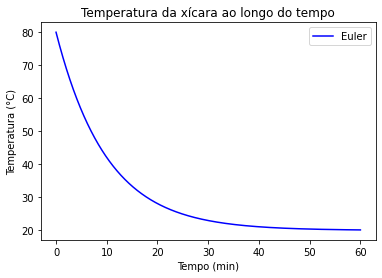

In [8]:
plt.plot(vt,T,'b',label='Euler')
plt.title('Temperatura da xícara ao longo do tempo')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

<h2>3.3 &nbsp; Estudo comparativo - Diferentes passos de derivação</h2>

&nbsp; Este tópico tem como objetivo estudar o comportamento da solução numérica para diferentes passos de derivação.
<br>
<br>
&nbsp; Construímos um vetor <b><i>passos</i></b> contendo  os passos de derivação. &nbsp; Além disso, é importante para o estudo comparativo que as curvas possuam cores distintas. &nbsp; Desta forma, construímos também um vetor de <i><b>cores</b></i>. 
<br> &nbsp; Cada elemento de <i><b>cores</b></i> corresponde a um elemento de <i><b>passos</b></i> da seguinte forma:
<center><i><b>passos(i)</b></i> $=$ <i><b>cores(i)</b></i>, $i=1,2,3,\dots$</center>

In [9]:
passos = np.array([2.5,2,1,0.1,0.01,0.001])
cores = np.array(['m','c','r','k','g','b'])
print(' |passos| = {} , |cores| = {}'.format(passos.shape[0],cores.shape[0]))

 |passos| = 6 , |cores| = 6


&nbsp; Dessa forma, escrevemos um <i>loop</i> para percorrer os elementos de <b><i>passos</i></b> e assim gerar diferentes soluções através da função <b><i>sol_euler</i></b>:

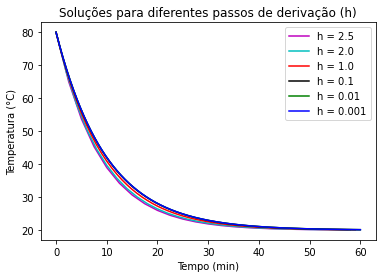

In [10]:
#Criando loop que percorre os elementos de passos
for passo in passos:
   
    #Criando vetor tempo
    vt = np.arange(ti,tf,passo)

    #Chamando a função sol_euler 
    T = sol_euler(vt,T0)
    
    #Grafico da curva    
    plt.plot(vt,T,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))

#Exibindo figura
plt.title('Soluções para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

&nbsp; A medida em que o passo de derivação diminui, as curvas se aproximam e suavizam. No tópico 4, estudaremos o comportamento da solução numérica comparada a solução analítica para diferentes passos de derivação.

<h2>3.4 &nbsp; Estudo comparativo - Soluções numéricas e analítica</h2>

&nbsp; Este tópico tem o objetivo de comparar soluções numéricas e analítica, a fim de determinar os passos de derivação que geram uma solução numérica próxima a analítica.

&nbsp; Para o cálculo da função erro entre a solução numérica e analítica, construímos a função <i><b>f_erro(&lt;vetor_da_solução_analítica&gt;,&lt;vetor_da_solução_numérica&gt;)</b></i>:

In [11]:
%%writefile ../python/f_erro.py
def f_erro(sol_analitica,sol_numerica):
    
    erro = sol_analitica - sol_numerica
    
    return erro

Overwriting ../python/f_erro.py


&nbsp; Importando a função de <b>[11]</b>:

In [12]:
from f_erro import f_erro

&nbsp; Neste momento, escrevemos um algoritmo similar ao <b>input [10]</b>, mas, ao invés de exibir o gráfico para diferentes passos de derivação, exibiremos o erro para estes passos.

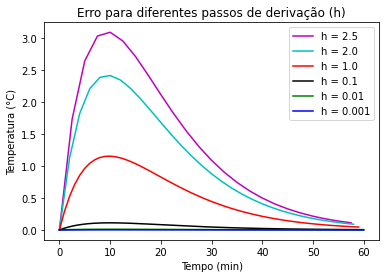

In [13]:
#Criando loop para diferentes passos de derivação
for passo in passos:
   
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler 
    T = sol_euler(vt,T0)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,T)
    
    #Grafico da curva    
    plt.plot(vt,err,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))
    
#Exibindo figura
plt.title('Erro para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

&nbsp; Nota-se que a medida em que o passo de derivação diminui, o erro entre a solução numérica e analítica também diminui. 
&nbsp; Desta forma, concluímos que para obter uma solução numérica aceitável pelo método de Euler, devemos tomar um passo de derivação próximo de 0. Vale salientar que para todos os passos de derivação utilizados, a solução analítica é maior que a solução numérica.

<h2>3.5 &nbsp; Obtendo o maior passo de derivação para produzir uma aproximação aceitável</h2>

&nbsp; Cada problema, em particular, pode ser abordado de diferentes maneiras. Neste caso, o modelo físico descreve o comportamento da temperatura de uma xícara ao longo do tempo. &nbsp; Para este problema, utilizamos celsius como escala. Assim, antes devemos questionar o que é uma aproximação aceitável para nosso problema.

&nbsp; Qualquer solução com erro máximo menor que <b>0.4</b> é uma aproximação aceitável para este problema, dada a escala, este valor será o limite superior <i><b>limite_sup</b></i> para o erro máximo:

In [14]:
limite_sup = 0.4

&nbsp; Declaramos o passo de derivação inicial valendo 1, uma vez que estamos interessados em passos entre 0 e 1:

In [15]:
passo = 1

&nbsp; Além disso, precisamos, convenientemente, definir o decréscimo do passo de derivação, de forma que o passo de derivação tenda a zero:

In [16]:
decrescimo = 0.01

&nbsp; Além disso, vamos criar uma matriz com finalidade de armazenar o passo atual bem como seu respectivo erro máximo.

In [17]:
dados = [[0, 0]]

&nbsp; Continuando, escrevemos um <i>loop</i> de forma que o passo de derivação seja reduzido até que o erro máximo entre a solução numérica e analítica seja menor que o limite superior.

In [18]:
#variável auxiliar
err = np.array([T0])

while np.amax(err) > limite_sup:
    
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler 
    T = sol_euler(vt,T0)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,T)
    
    #Adicionando linhas à matriz (tabela)
    dados = np.vstack([dados,[round(passo, 2),np.amax(err)]])
    
    #Realizando decrescimo do passo de derivação
    passo = passo - decrescimo

&nbsp; Finalmente, exibimos os dados armazenados:

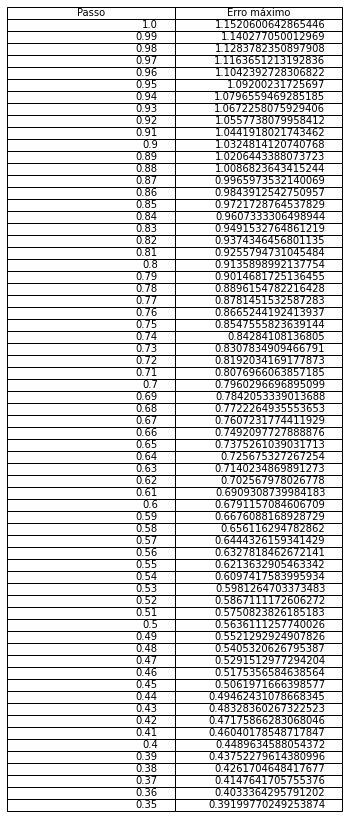

Última linha: [0.35      0.3919977]


In [25]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Passo', 'Erro máximo']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')

plt.show()

print('Última linha: {}'.format(dados[dados.shape[0]-1]))

&nbsp; Conforme a tabela gerada pelo <b>Input [19]</b>, o passo de derivação que devemos utilizar para produzirmos uma simulação com erro máximo menor que <b>0.4</b>, sob as condições descritas ao longo deste tópico, é de <b>0.35</b>.

<h1>4 &nbsp; Método de Euler modificado  </h1>

&nbsp; Seja o problema de valor inicial (Lei de resfriamento de Newton):

$$\begin{cases} T'(t)=f(t,T)  \\ T_{0}= g(t_{0}) \end{cases}$$

&nbsp; O método de Euler modificado baseia-se em duas inclinações $k_{1}$ e $k_{2}$, onde a média aritmética dessas inclinações, $k$, é utilizada como inclinação para estimar o valor de $T_{1}$, partindo de um ponto $(t_{0},T_{0})$, onde:

<center>$k_{1}$ é a inclinação em $(t_{0},T_{0})$</center>
<center>$k_{2}$ é a inclinação em $(t_{1},T_{1})$</center>
<center>$k$ é a média aritmética entre $k_{1}$ e $k_{2}$</center>
<center>$T_{1}=T_{0}+h*k$ é a equação do método de Euler modificado</center>

&nbsp; Partindo de $k_{1}=f(t_{0},T_{0})$, podemos definir $T_{1}$ pelo método de Euler com passo $h$:

$$ T_{1}=T_{0}+h*k_{1}$$

&nbsp; E,

$$t_{1}=t_{0}+h$$

&nbsp; Dessa forma, $k_{2}$ pode ser escrito como:

$$k_{2}=f(t_{0}+h,T_{0}+h*k_{1})$$

&nbsp; De forma compacta, podemos escrever o método de Euler modificado como:

$$ t_{i+1} = t_{i} + h \:,\: T_{i+1}=T_{i}+\frac{h}{2}[f(t_{i},T_{i})+f(t_{i}+h,T_{i}+h*f(t_{i},T_{i}\:)\:)\:] $$

<h2>4.1 &nbsp; Método de Euler modificado - Pseudocódigo</h2>
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<b>Entrada: A função $f(T)$, a condição inicial $(t_{0},T_{0})$, o passo $h$ e o vetor tempo $t$.</b><br>
    <b>Saída: os vetores $t$ e $T$ tais que $T_{i} \approx T(t_{i})$ .</b><br>
    <b>Início:</b>
    <ol>
  <li>$t\leftarrow  t_{inicial}:h:t_{final}$</li>
  <li>$T_{1}\leftarrow  80$</li>
  <li><b>para</b> t <b>faça</b></li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$T_{i+1} \leftarrow  T_{i}+(h/2)*f(T_{i}+h*f(T_{i}))$</li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$T \leftarrow T_{i+1}$</li>
  <li>fim</li>
  <li>retorna($t,T$)</li>
</ol> 
</div>

<h2>4.2 &nbsp; Método de Euler modificado - Implementação</h2>

&nbsp; Importando as bibliotecas NumPy e Matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Carregando o diretório <i><b>python/</b></i> que contém as funções escritas ao longo dos tópicos:

In [2]:
import sys 
sys.path.insert(0, '../python')

&nbsp; Construindo e salvando em <i><b>python/</b></i> a função <b><i>sol_euler_mod(&lt;vetor_tempo&gt;,&lt;condição_inicial&gt;)</i></b>, responsável por aplicar o método de Euler modificado num intervalo de tempo <b><i>vt</i></b>, dada a condição inicial <b><i>T0</i></b>:

In [3]:
%%writefile ../python/sol_euler_mod.py
#dependências
import numpy as np
from f import f

def sol_euler_mod(vt,T0):
    
    #Declarando vetor de temperaturas
    T = np.array([T0])
    
    #Obtendo passo de derivação (h)
    h = vt[2] - vt[1]

    #Aproximando T(i) pelo método de Euler modificado
    for t in vt:
        Ti = T[-1]+(h/2)*(f(T[-1])+f(T[-1]+h*f(T[-1])))
        T = np.append(T,Ti)
        
    return T[0:T.shape[0]-1]

Overwriting ../python/sol_euler_mod.py


&nbsp; Uma vez definido o método de Euler modificado, basta declarar o passo de derivação <b><i>h</i></b>, a condição inicial <b><i>T0</i></b>, o tempo inicial <b><i>ti</i></b>, o tempo final <b><i>tf</i></b> e o intervalo de tempo <b><i>vt</i></b>:

In [4]:
#Passo de derivação
h = 0.001

#Condição inicial
T0 = 80

#tempo inicial
ti = 0

#tempo final
tf = 60

#Intervalo de 0 à 60 minutos com passo h
vt = np.arange(ti,tf,h)

Importando a função <b><i>sol_euler_mod</i></b>:

In [5]:
from sol_euler_mod import sol_euler_mod

&nbsp; Atribuindo as variáveis aos parâmetros de <b><i>sol_euler_mod</i></b>:

In [6]:
T = sol_euler_mod(vt,T0)
print(T)
print('O vetor de temperaturas tem {} elementos'.format(T.shape[0]))

[80.         79.9940003  79.9880012  ... 20.14876976 20.14875488
 20.14874001]
O vetor de temperaturas tem 60000 elementos


&nbsp; Exibindo o gráfico <b>vt</b> $\times$ <b>T</b> 

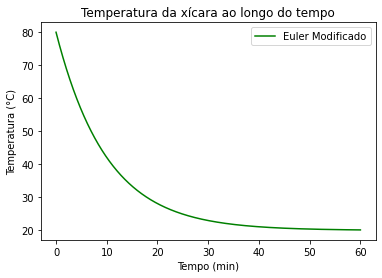

In [7]:
plt.plot(vt,T,'g',label='Euler Modificado')
plt.title('Temperatura da xícara ao longo do tempo')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

<h2>4.3 &nbsp; Estudo comparativo - Diferentes passos de derivação</h2>
&nbsp; Este tópico tem como objetivo estudar o comportamento da solução numérica para diferentes passos de derivação.
<br>
<br>
&nbsp; Construindo o vetor <b><i>passos</i></b> e o vetor <i><b>cores</b></i> da seguinte forma:
<center><i><b>passos(i)</b></i> $=$ <i><b>cores(i)</b></i>, $i=1,2,3,\dots$</center>

In [8]:
passos = np.array([4,2,1,0.1,0.01,0.001])
cores = np.array(['m','c','r','k','g','b'])
print(' |passos| = {} , |cores| = {}'.format(passos.shape[0],cores.shape[0]))

 |passos| = 6 , |cores| = 6


&nbsp; Dessa forma, escrevemos um <i>loop</i> para percorrer os elementos de <b><i>passos</i></b> e assim gerar diferentes soluções através da função <b><i>sol_euler</i></b>:

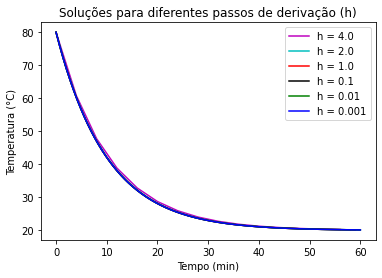

In [9]:
#Criando loop que percorre os elementos de passos
for passo in passos:
   
    #Criando vetor tempo
    vt = np.arange(ti,tf,passo)

    #Chamando a função sol_euler_mod 
    T = sol_euler_mod(vt,T0)
    
    #Grafico da curva    
    plt.plot(vt,T,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))

#Exibindo figura
plt.title('Soluções para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

&nbsp; Nota-se que pelo método de Euler modificado, as soluções para diferentes passos, são mais próximas entre si do que as soluções para os mesmos passos pelo método de Euler. 
<br>
&nbsp; Basta explicitar que as soluções não só estão mais próximas entre si, mas também estão mais próximas da solução analítica. &nbsp; Para isto, precisamos construir um gráfico contendo o erro cometido em cada passo em relação à solução analítica.
<br>
<br>
<h2>4.4&nbsp; Estudo comparativo - Soluções numéricas e analítica</h2>
&nbsp; Importando a função <i><b>f_erro(&lt;vetor_da_solução_analítica&gt;,&lt;vetor_da_solução_numérica&gt;)</b></i>:

In [10]:
from f_erro import f_erro

&nbsp; Neste momento, escrevemos um algoritmo similar ao <b>input [9]</b>, mas, ao invés de exibir o gráfico para diferentes passos de derivação, exibiremos o erro para estes passos.

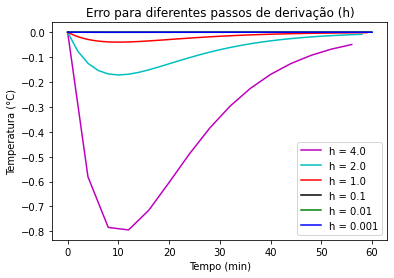

In [11]:
#Criando loop para diferentes passos de derivação
for passo in passos:
   
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler_mod 
    T = sol_euler_mod(vt,T0)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,T)
    
    #Grafico da curva    
    plt.plot(vt,err,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))
    
#Exibindo figura
plt.title('Erro para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

&nbsp; Nota-se que a medida em que o passo de derivação diminui, o erro entre a solução numérica e analítica se aproxima de zero. 
&nbsp; Desta forma, concluímos que para obter uma solução numérica aceitável pelo método de Euler modificado, devemos tomar um passo de derivação próximo de 0. &nbsp; Além disso, para todos os passos utilizados, a solução numérica é maior que a solução analítica, fazendo oposição ao método de Euler.

<h2>4.5 &nbsp; Obtendo o maior passo de derivação para produzir uma aproximação aceitável</h2>

&nbsp; Uma solução com erro máximo menor que <b>0.4</b> é uma aproximação aceitável para este problema, dada a escala, este valor será o limite superior <i><b>limite_sup</b></i> para o erro máximo:

In [12]:
limite_sup = 0.4

&nbsp; Declaramos o passo de derivação inicial valendo 3, uma vez que estamos trabalhando com um método numérico que converge rapidamente:

In [13]:
passo = 3

&nbsp; Além disso, precisamos, convenientemente, definir o decréscimo do passo de derivação, de forma que o passo de derivação tenda a zero:

In [14]:
decrescimo = 0.01

&nbsp; Além disso, vamos criar uma matriz com finalidade de armazenar o passo atual bem como seu respectivo erro máximo.

In [15]:
dados = [[0, 0]]

&nbsp; Continuando, escrevemos um <i>loop</i> de forma que o passo de derivação seja reduzido até que o erro máximo entre a solução numérica e analítica seja menor que o limite superior.
<br>
<b>&nbsp; Atenção:</b> Devemos tomar os valores absolutos  dos elementos do vetor erro <b>abs(erro[])</b>:

In [16]:
#variável auxiliar
err = np.array([T0])

while np.amax(abs(err)) > limite_sup:
    
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler_mod 
    T = sol_euler_mod(vt,T0)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,T)
    
    #Adicionando linhas à matriz (tabela)
    dados = np.vstack([dados,[round(passo, 2),np.amax(abs(err))]])
    
    #Realizando decrescimo do passo de derivação
    passo = passo - decrescimo

&nbsp; Finalmente, exibimos os dados armazenados:

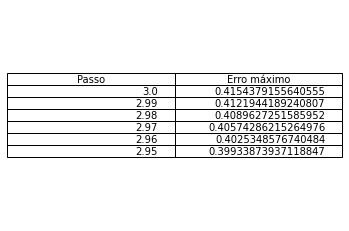

Última linha: [2.95       0.39933874]


In [17]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Passo', 'Erro máximo']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')

plt.show()

print('Última linha: {}'.format(dados[dados.shape[0]-1]))

&nbsp; Conforme a tabela gerada pelo <b>Input [17]</b>, o passo de derivação que devemos utilizar para produzirmos uma simulação com erro máximo menor que <b>0.4</b>, sob as condições descritas ao longo deste tópico, é de <b>2.95</b>.

<h1> 5 &nbsp; Método de Runge-Kutta de ordem 4 </h1>

&nbsp; O método de Runge-Kutta de ordem 4 consiste na média ponderada $K$ entre quatro inclinações $k_{1}$, $k_{2}$, $k_{3}$ e $k_{4}$, onde $k_{1}$ é calculada em $t_{0}$ (início do intevalo), $k_{2}$ e $k_{3}$ em $t_{0}+\frac{h}{2}$ (metade do intevalo) e $k_{4}$ em $t_{0}+h$ (final do intervalo).

&nbsp; Seja o problema de valor inicial (Lei de resfriamento de Newton):

$$\begin{cases} T'(t)=f(t,T)  \\ T_{0}= g(t_{0}) \end{cases}$$

&nbsp; As inclinações $k_{i}$, $i=1,2,3,4$ são dadas por:

$$ k_{1} = f(t_{0},T_{0}) $$
$$ k_{2} = f(t_{0}+\frac{h}{2},T_{0}+\frac{h}{2}*k_{1}) $$
$$ k_{3} = f(t_{0}+\frac{h}{2},T_{0}+\frac{h}{2}*k_{2}) $$
$$ k_{4} = f(t_{0}+h,T_{0}+h*k_{3}) $$

&nbsp; $K$ é a média ponderada entre as quatro inclinações:

$$ K = \frac{1}{6}(k_{1}+2k_{2}+2k_{3}+k_{4})$$

&nbsp; Logo, a aproximação para $T_{1}$ é dada por:

$$ T_{1} = T_{0} + h*K$$

<h2>5.1 &nbsp; Método de Runge-Kutta (ordem 4) - Pseudocódigo</h2>
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<b>Entrada: A função $f(T)$, a condição inicial $(t_{0},T_{0})$, o passo $h$ e o vetor tempo $t$.</b><br>
    <b>Saída: os vetores $t$ e $T$ tais que $T_{i} \approx T(t_{i})$ .</b><br>
    <b>Início:</b>
    <ol>
  <li>$t\leftarrow  t_{inicial}:h:t_{final}$</li>
  <li>$T_{1}\leftarrow  80$</li>
  <li><b>para</b> t <b>faça</b></li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$ k_{1} = f(T_{i})$</li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$ k_{2} = f(T_{i}+(h/2)*k_{1})$</li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$ k_{3} = f(T_{i}+(h/2)*k_{2})$</li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$ k_{4} = f(T_{i}+h*k_{3})$</li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$ K = (1/6)*(k1+2*(k2+k3)+k4)$</li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$T_{i+1} \leftarrow  T_{i}+h*K$</li>
  <li>|&nbsp;&nbsp;&nbsp;&nbsp;$T\leftarrow T_{i+1}$</li>
  <li>fim</li>
  <li>retorna($t,T$)</li>
</ol> 
</div>

<h2>5.2 &nbsp; Método de Runge-Kutta (ordem 4) - Implementação</h2>

&nbsp; Importando as bibliotecas NumPy e Matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Incluindo diretório "python" onde se encontram as algumas funções definidas em seções anteriores:

In [2]:
import sys 
sys.path.insert(0, '../python')

&nbsp; Construindo a função <b><i>sol_rk4(&lt;vetor_tempo&gt;,&lt;condição_inicial&gt;)</i></b>, responsável por aplicar o método de Euler modificado num intervalo de tempo <b><i>vt</i></b>, dada a condição inicial <b><i>T0</i></b>:

In [3]:
%%writefile ../python/sol_rk4.py
#dependencias 
import numpy as np
from f import f

def sol_rk4(vt,T0):
    
    #Declarando vetor de temperaturas
    T = np.array([T0])
    
    #Obtendo passo de derivação (h)
    h = vt[2] - vt[1]

    #Aproximando T(i) pelo método de Euler modificado
    for t in vt:
        k1 = f(T[-1])
        k2 = f(T[-1]+(h/2)*k1)
        k3 = f(T[-1]+(h/2)*k2)
        k4 = f(T[-1]+h*k3)
        K = (1/6)*(k1+2*(k2+k3)+k4)
        Ti = T[-1]+h*K
        T = np.append(T,Ti)
        
    return T[0:T.shape[0]-1]

Overwriting ../python/sol_rk4.py


&nbsp; Uma vez definido o método de Runge-Kutta (ordem 4), basta declarar o passo de derivação <b><i>h</i></b>, a condição inicial <b><i>T0</i></b>, o tempo inicial <b><i>ti</i></b>, o tempo final <b><i>tf</i></b> e o intervalo de tempo <b><i>vt</i></b>:

In [4]:
#Passo de derivação
h = 0.001

#Condição inicial
T0 = 80

#tempo inicial
ti = 0

#tempo final
tf = 60

#Intervalo de 0 à 60 minutos com passo h
vt = np.arange(ti,tf,h)

Importando função <b><i>sol_rk4</i></b>

In [5]:
from sol_rk4 import sol_rk4

&nbsp; Atribuindo as variáveis aos parâmetros de <b><i>sol_rk4</i></b>:

In [6]:
T = sol_rk4(vt,T0)
print(T)
print('O vetor de temperaturas tem {} elementos'.format(T.shape[0]))

[80.         79.9940003  79.9880012  ... 20.14876975 20.14875488
 20.14874   ]
O vetor de temperaturas tem 60000 elementos


&nbsp;Exibindo o gráfico <b>vt</b> $\times$ <b>T</b> 

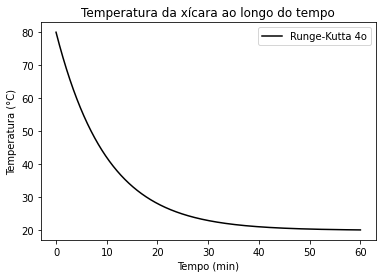

In [7]:
plt.plot(vt,T,'k',label='Runge-Kutta 4o')
plt.title('Temperatura da xícara ao longo do tempo')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

<h2>5.3 &nbsp; Estudo comparativo - Diferentes passos de derivação</h2>
&nbsp; Este tópico tem como objetivo estudar o comportamento da solução numérica para diferentes passos de derivação.
<br>
<br>
&nbsp; Construindo o vetor <b><i>passos</i></b> e o vetor <i><b>cores</b></i> da seguinte forma:
<center><i><b>passos(i)</b></i> $=$ <i><b>cores(i)</b></i>, $i=1,2,3,\dots$</center>

In [8]:
passos = np.array([4,2,1,0.1,0.01,0.001])
cores = np.array(['m','c','r','k','g','b'])
print(' |passos| = {} , |cores| = {}'.format(passos.shape[0],cores.shape[0]))

 |passos| = 6 , |cores| = 6


&nbsp; Dessa forma, escrevemos um <i>loop</i> para percorrer os elementos de <b><i>passos</i></b> e assim gerar diferentes soluções através da função <b><i>sol_rk4</i></b>:

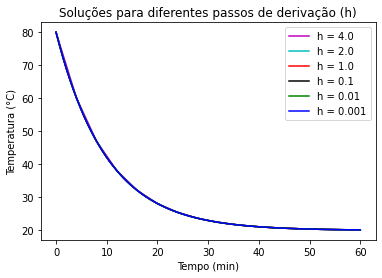

In [9]:
#Criando loop que percorre os elementos de passos
for passo in passos:
   
    #Criando vetor tempo
    vt = np.arange(ti,tf,passo)

    #Chamando a função sol_euler_mod 
    T = sol_rk4(vt,T0)
    
    #Grafico da curva    
    plt.plot(vt,T,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))

#Exibindo figura
plt.title('Soluções para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

&nbsp; Nota-se que as soluções estão tão próximas que houve uma sobreposição de <i>pixels</i>, impossibilitando a distinção das seis curvas.
<br>
&nbsp; Vamos reescrever o algoritmo em <b>Input [10]</b> mas multiplicando o passo por <b>3</b> a fim de colocar em evidência a convergência do método <b>RK4</b>:

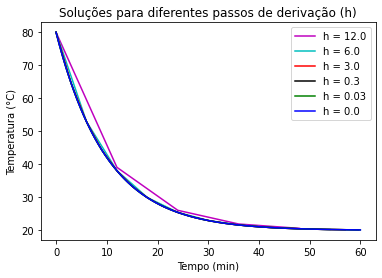

In [10]:
#Criando loop que percorre os elementos de passos
for passo in passos:
   
    #Criando vetor tempo
    vt = np.arange(ti,tf,3*passo)

    #Chamando a função sol_euler_mod 
    T = sol_rk4(vt,T0)
    
    #Grafico da curva    
    plt.plot(vt,T,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(round(3*passo,2)))

#Exibindo figura
plt.title('Soluções para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

<h2>5.4 &nbsp; Estudo comparativo - Soluções numéricas e analítica</h2>
<br>
&nbsp; Importando a função <b>f_erro(&lt;vetor_da_solução_analítica&gt;,&lt;vetor_da_solução_numérica&gt;)</b></i>:

In [11]:
from f_erro import f_erro

&nbsp; Neste momento, escrevemos um algoritmo similar ao <b>input [9] - [10]</b>, mas, ao invés de exibir o gráfico para diferentes passos de derivação, exibiremos o erro para estes passos.

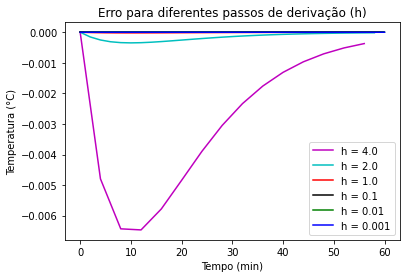

In [12]:
#Criando loop para diferentes passos de derivação
for passo in passos:
   
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler_mod 
    T = sol_rk4(vt,T0)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,T)
    
    #Grafico da curva    
    plt.plot(vt,err,'{}'.format(cores[np.where(passos==passo)[0][0]]),label='h = {}'.format(passo))
    
#Exibindo figura
plt.title('Erro para diferentes passos de derivação (h)')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

&nbsp; Nota-se que a medida em que o passo de derivação diminui, o erro entre a solução numérica e analítica se aproxima de zero. 
&nbsp; Desta forma, concluímos que para obter uma solução numérica aceitável pelo método RK4, devemos tomar um passo de derivação próximo de 0. &nbsp; Além disso, para todos os passos utilizados, a solução numérica é maior que a solução analítica, fazendo oposição ao método de Euler. 
<br>
&nbsp; O método RK4 apresenta convergência mais rápida do que os métodos de Euler e Euler modificado, observando a distância entre as curvas de passo 2 e 4.

<h2>5.5 &nbsp; Obtendo o maior passo de derivação para produzir uma aproximação aceitável</h2>

&nbsp; Uma solução com erro máximo menor que <b>0.4</b> é uma aproximação aceitável para este problema, dada a escala, este valor será o limite superior <i><b>limite_sup</b></i> para o erro máximo:

In [13]:
limite_sup = 0.4

&nbsp; Declaramos o passo de derivação inicial valendo <b>10</b>, uma vez que estamos trabalhando com um método numérico que converge rapidamente:

In [14]:
passo = 10

&nbsp; Também precisamos, convenientemente, definir o decréscimo do passo de derivação, de forma que o passo de derivação tenda a zero:

In [15]:
decrescimo = 0.01

&nbsp; Além disso, vamos criar uma matriz com finalidade de armazenar o passo atual bem como seu respectivo erro máximo.

In [16]:
dados = [[0, 0]]

&nbsp; Continuando, escrevemos um <i>loop</i> de forma que o passo de derivação seja reduzido até que o erro máximo entre a solução numérica e analítica seja menor que o limite superior.
<br>
<b>&nbsp; Atenção:</b> Devemos tomar os valores absolutos  dos elementos do vetor erro <b>abs(erro[])</b>:

In [17]:
#variável auxiliar
err = np.array([T0])

while np.amax(abs(err)) > limite_sup:
    
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Chamando a função sol_euler_mod 
    T = sol_rk4(vt,T0)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = f_erro(sol_analitica,T)
    
    #Adicionando linhas à matriz (tabela)
    dados = np.vstack([dados,[round(passo, 2),np.amax(abs(err))]])
    
    #Realizando decrescimo do passo de derivação
    passo = passo - decrescimo

&nbsp; Finalmente, exibimos os dados armazenados:

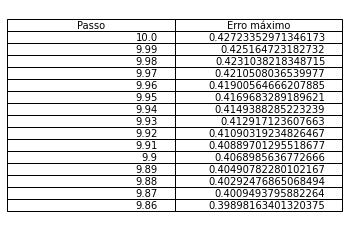

Última linha: [9.86       0.39898163]


In [18]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Passo', 'Erro máximo']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')

plt.show()

print('Última linha: {}'.format(dados[dados.shape[0]-1]))

&nbsp; Conforme a tabela gerada pelo <b>Input [18]</b>, o passo de derivação que devemos utilizar para produzirmos uma simulação com erro máximo menor que <b>0.4</b>, sob as condições descritas ao longo deste tópico, é de <b>9.86</b>.

<h1>6. &nbsp;Estudo comparativo - Soluções numéricas e analítica com <i>odeint</i> e <i>solve_ivp</i></h1>

&nbsp; Esta subseção tem como objetivo realizar um estudo similar aos realizados nas seções anteriores, adicionando aproximações geradas através das bibliotecas <i>odeint</i> e <i>solve_ivp</i>

<h2>6.1 &nbsp; O maior passo de derivação para produzir uma aproximação aceitável</h2>

&nbsp; Vimos nas seções anteriores o maior passo de derivação para produzir uma aproximação aceitável, com exceção das aproximações geradas através de bibliotecas:

<center><b>Tabela 1 - Passo máximo para obter o erro máximo menor que 0.4 com decréscimo de 0.01</b></center>

| Método | Passo máximo | Erro máximo |
| -- | -- | --  | 
| Euler | 0.35 |  0.3919977 |
| Euler modificado | 2.95 | 0.39933874
| RK4 | 9.86 | 0.39898163 |

<center> Fonte: O autor</center>

&nbsp; Pergunta-se: Qual será o passo máximo, sob as condições dos estudos das seções anteriores, para as aproximações geradas por bibliotecas?&nbsp; Para iniciar este estudo, vamos importar as bibliotecas NumPy, SciPy e Matplotlib:


In [1]:
%%time
import numpy as np
import scipy.integrate as sciInt
import matplotlib.pyplot as plt

CPU times: total: 1.72 s
Wall time: 1.72 s


&nbsp; Carregando o diretório <i><b>python/</b></i> que contém as funções escritas ao longo dos tópicos:

In [2]:
%%time
import sys
sys.path.insert(0, '../python')

CPU times: total: 0 ns
Wall time: 0 ns


&nbsp; Importando o <b><i>modelo(&lt;temperatura&gt;,&lt;tempo&gt;)</i></b>:

In [3]:
%%time
from modelo import modelo
from f_erro import f_erro

CPU times: total: 0 ns
Wall time: 5 ms


&nbsp; Declarando o passo de derivação <b><i>h</i></b>, a condição inicial <b><i>T0</i></b>, o tempo inicial <b><i>ti</i></b>, o tempo final <b><i>tf</i></b> e o intervalo de tempo <b><i>vt</i></b>:

In [4]:
%%time

#Passo de derivação
h = 0.001

#Condição inicial
T0 = 80

#tempo inicial
ti = 0

#tempo final
tf = 60

#Intervalo de 0 à 60 minutos com passo h
vt = np.arange(ti,tf,h)

CPU times: total: 0 ns
Wall time: 998 µs


&nbsp; Uma solução com erro máximo menor que <b>0.4</b> é uma aproximação aceitável para este problema, dada a escala, este valor será o limite superior <i><b>limite_sup</b></i> para o erro máximo. &nbsp; Como é de se esperar, as funções <i>odeint</i> e <i>solve_ivp (RK45)</i> são mais aprimorados que os métodos escritos nas seções anteriores. &nbsp; Então, ao invés de diminuirmos o valore do <i><b>passo</b></i> a fim de encontrar o <i>passo máximo</i>, vamos acrescentar, a fim de verificar se para algum vetor tempo <b><i>vt</i></b>, excederemos o <b><i>limit_sup</i></b>.

In [5]:
%%time
limite_sup = 0.4
passo = 0.01
acrescimo = 0.01

CPU times: total: 0 ns
Wall time: 0 ns


<h3>solve_ivp (RK45)</h3>
    
&nbsp; Continuando, escrevemos um <i>loop</i> de forma que o passo de derivação seja reduzido até que o erro máximo entre a solução numérica e analítica seja menor que o limite superior.
<br>
<b>&nbsp; Atenção:</b> Devemos tomar os valores absolutos  dos elementos do vetor erro <b>abs(erro[])</b>:

In [6]:
%%time
#variáveis auxiliares
err = np.array([0])
passo_max = np.array([0])
    
while np.amax(err) < limite_sup and passo < 59:
    
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Método de Runge-Kutta 45
    T_rk45 = sciInt.solve_ivp(modelo, t_span=(0,max(vt)), y0=[T0], t_eval=vt)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = abs(f_erro(sol_analitica,T_rk45.y[0]))
    
    #Verificando se limite superior é excedido
    if np.amax(err) > 0.4:       
        #Adiciona passo ao vetor passo_max
        passo_max = np.append(passo_max,np.amax(err))
        break

    #Realizando acréscimo do passo de derivação
    passo = passo + acrescimo
    
print('Passo atual: {}'.format(passo))

Passo atual: 59.00999999999683
CPU times: total: 11.4 s
Wall time: 11.5 s


&nbsp; Observando o passo atual, podemos concluir que o algoritmo <b>não pôde encontrar </b> um <i>passo</i>, entre 0.01 e 59 com acréscimo de 0.01, que seja maior ou igual a 4. &nbsp; Isto quer dizer:
<center>Tomando o intevalo de tempo de 0 à 60 minutos, para todo <i>passo</i> de tempo entre 0.01 e 59 com acréscimo de 0.01, o erro máximo entre a solução numérica e analítica não excede o valor de 0.4</center> 

<h3>odeint (LSODA)</h3>

&nbsp; Utilizando um algoritmo similar ao escrito em <b>Input [6],</b> vamos verificar se o método <i>LSODA</i> tem o mesmo comportamento que o método Runge-Kutta-Fehlberg.

&nbsp; Declarando variáveis:

In [7]:
%%time
limite_sup = 0.4
passo = 0.01
acrescimo = 0.01

CPU times: total: 0 ns
Wall time: 0 ns


&nbsp; Escrevendo algoritmo para obter o passo máximo que gere uma solução aceitável <i><b>passo_max</b></i>:

In [8]:
%%time
#variáveis auxiliares
err = np.array([0])
passo_max = np.array([0])
    
while np.amax(err) < limite_sup and passo < 59:
    
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Método LSODA
    T_lsoda = sciInt.odeint(modelo, y0=T0, t=vt, tfirst=True)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Algoritmo para a função erro
    err = np.array([80])
    i = 0 
    for elemento in T_lsoda:
        err = np.append(err,abs(sol_analitica[i]-elemento))
        i = i + 1
    err = np.delete(err, [0])
    
    #Verificando se limite superior é excedido
    if np.amax(err) > 0.4:       
        #Adiciona passo ao vetor passo_max
        passo_max = np.append(passo_max,np.amax(err))
        break

    #Realizando acréscimo do passo de derivação
    passo = passo + acrescimo
    
print('Passo atual {}:'.format(passo))

Passo atual 59.00999999999683:
CPU times: total: 6.3 s
Wall time: 6.31 s


&nbsp; Observando o passo atual, podemos concluir que o algoritmo <b>não pôde encontrar </b> um <i>passo</i>, entre 0.01 e 59 com acréscimo de 0.01, que seja maior ou igual a 4.
<br>
&nbsp; Tanto o método <i>RK45</i> quanto o método <i>LSODA</i>, sob as condições fornecidas, são melhores em termos de convergência quando comparados aos métodos estudados nas seções 3 à 5.

<h2>6.2 &nbsp; Erro cometido entre as soluções numéricas e analítica</h2>

&nbsp; Neste escrever um algoritmo para exibir o gráfico das soluções numéricas e analítica.
<br>
&nbsp; Estamos interessados em comparar com a solução analítica as seguintes aproximações numéricas:
<ol>
    <li>&nbsp;Método de Euler</li>
    <li>&nbsp;Método de Euler modificado</li>
    <li>&nbsp;Método Runge-Kutta de 4ª ordem (RK4)</li>
    <li>&nbsp;Método Runge-Kutta-Fehlberg (RK45)</li>
    <li>&nbsp;LSODA</li>
</ol>


&nbsp; Importando as funções: <b><i>sol_euler</i></b>, <b><i>sol_euler_mod</i></b>, <b><i>sol_rk4</i></b>, <b><i>modelo</i></b> e <b><i>f_erro</i></b>:

In [9]:
%%time
from sol_euler import sol_euler
from sol_euler_mod import sol_euler_mod
from sol_rk4 import sol_rk4
from modelo import modelo
from f_erro import f_erro

CPU times: total: 15.6 ms
Wall time: 8.99 ms


&nbsp; Declarando o passo de derivação <b><i>h</i></b>, a condição inicial <b><i>T0</i></b>, o tempo inicial <b><i>ti</i></b>, o tempo final <b><i>tf</i></b> e o intervalo de tempo <b><i>vt</i></b>:

In [10]:
%%time
#Passo de derivação
h = 0.001

#Condição inicial
T0 = 80

#tempo inicial
ti = 0

#tempo final
tf = 60

#Intervalo de 0 à 60 minutos com passo h
vt = np.arange(ti,tf,h)

CPU times: total: 0 ns
Wall time: 0 ns


&nbsp; Obtendo aproximações pelos métodos numéricos listados:

In [11]:
%%time
#Método de Euler
T_euler = sol_euler(vt,T0)

#Método de Euler modificado
T_euler_mod = sol_euler_mod(vt,T0)

#Método de Runge-Kutta de 4ª ordem
T_rk4 = sol_rk4(vt,T0)

#Método LSODA
T_lsoda = sciInt.odeint(modelo, y0=T0, t=vt, tfirst=True)

#Método de Runge-Kutta 45
T_rk45 = sciInt.solve_ivp(modelo, t_span=(0,max(vt)), y0=[T0], t_eval=vt)

CPU times: total: 6.39 s
Wall time: 6.43 s


&nbsp; Obtendo solução analítica:

In [12]:
%%time
sol_analitica = 20+60*np.exp(-0.1*vt)

CPU times: total: 31.2 ms
Wall time: 2 ms


&nbsp; Exibindo o gráfico contendo o erro entre a solução analítica e as aproximações numéricas.
<center><b>| solução_analítica - aproximação_numérica |</b></center>

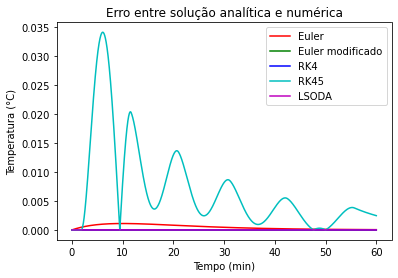

CPU times: total: 2.61 s
Wall time: 2.61 s


In [13]:
%%time

#Método de Euler
plt.plot(vt,abs(f_erro(sol_analitica,T_euler)),'r',label='Euler')

#Método de Euler modificado
plt.plot(vt,abs(f_erro(sol_analitica,T_euler_mod)),'g',label='Euler modificado')

#Método de Runge-Kutta de 4ª ordem
plt.plot(vt,abs(f_erro(sol_analitica,T_rk4)) ,'b',label='RK4')

#Método de Runge-Kutta 45
plt.plot(vt,abs(f_erro(sol_analitica,T_rk45.y[0])),'c',label='RK45')

#Método LSODA
T_lsoda_novo = np.array([80])
i = 0 
for elemento in T_lsoda:
    T_lsoda_novo = np.append(T_lsoda_novo,abs(sol_analitica[i]-elemento))
    i = i + 1
T_lsoda_novo = np.delete(T_lsoda_novo, [0])
plt.plot(vt,T_lsoda_novo ,'m',label='LSODA')


#Exibindo figura
plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

&nbsp; Vamos gerar uma nova figura, removendo a aproximação <b><font color="#00bfbf">RK45</font></b>, a fim de ampliarmos o gráfico e visualizarmos novas curvas.

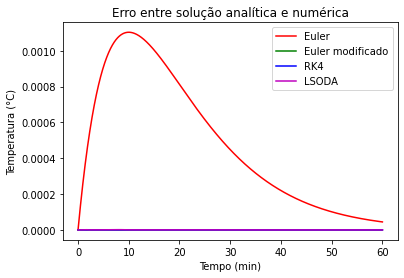

CPU times: total: 391 ms
Wall time: 391 ms


In [14]:
%%time
#Método de Euler
plt.plot(vt,abs(f_erro(sol_analitica,T_euler)),'r',label='Euler')

#Método de Euler modificado
plt.plot(vt,abs(f_erro(sol_analitica,T_euler_mod)),'g',label='Euler modificado')

#Método de Runge-Kutta de 4ª ordem
plt.plot(vt,abs(f_erro(sol_analitica,T_rk4)) ,'b',label='RK4')

#Método LSODA
plt.plot(vt,T_lsoda_novo ,'m',label='LSODA')

#Exibindo figura
plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Removendo a aproximação de <b><font color="#ff1a1a">Euler</font></b>:

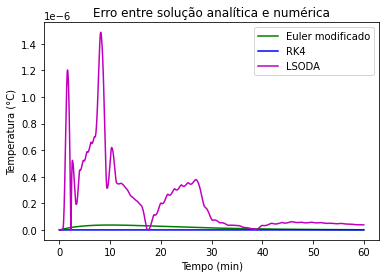

CPU times: total: 344 ms
Wall time: 343 ms


In [15]:
%%time
#Método de Euler modificado
plt.plot(vt,abs(f_erro(sol_analitica,T_euler_mod)),'g',label='Euler modificado')

#Método de Runge-Kutta de 4ª ordem
plt.plot(vt,abs(f_erro(sol_analitica,T_rk4)),'b',label='RK4')

#Método LSODA
plt.plot(vt,T_lsoda_novo ,'m',label='LSODA')

#Exibindo figura
plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Removendo a curva <b><font color="#bf00bf">LSODA</font></b>:

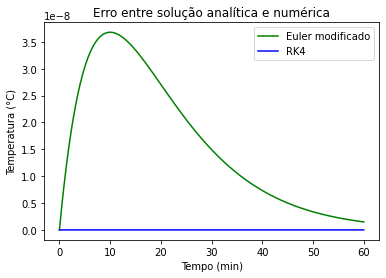

CPU times: total: 297 ms
Wall time: 296 ms


In [16]:
%%time
#Método de Euler modificado
plt.plot(vt,abs(f_erro(sol_analitica,T_euler_mod)),'g',label='Euler modificado')

#Método de Runge-Kutta de 4ª ordem
plt.plot(vt,abs(f_erro(sol_analitica,T_rk4)) ,'b',label='RK4')

#Exibindo figura
plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Finalmente, <i>plotando</i> somente a curva RK4, deixando de lado <b><font color="#198c19">Euler modificado</font></b>:

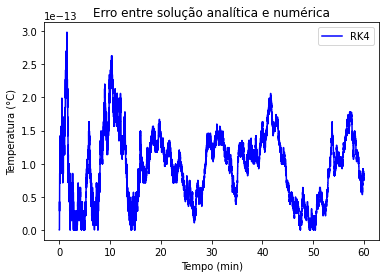

CPU times: total: 234 ms
Wall time: 231 ms


In [17]:
%%time
#Método de Runge-Kutta de 4ª ordem
plt.plot(vt,abs(f_erro(sol_analitica,T_rk4)) ,'b',label='RK4')

#Exibindo figura
plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()